In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class SVM(object):
    def __init__(self, eps = 0.01, iter_times = 10):
        self.eps = 0.01
        self.iter_times = iter_times
        
    def fit(self, X, y):
        self.weight = np.random.uniform(high = 0.1, low = -0.1, size = X.shape[1])
        self.bias = 0
        samples = X.shape[0]
        for i in range(self.iter_times):
            for j in range(samples):
                pred_y = self.predict(X[j])
                hinge_loss = max(0, 1 - y[j] * pred_y)
                grad = 0 if hinge_loss <= 0 else -y[j]*X[j]
                grad_b = 0 if hinge_loss <= 0 else 1
                self.weight = self.weight - self.eps*grad
                self.bias = self.bias - self.eps*grad_b
        return self
                
    def predict(self, X):
        return np.matmul(self.weight, X) + self.bias

In [3]:
n = 200
X = np.zeros((n, 2))
X[:, 0] = np.concatenate((np.random.randn(n/2)+5, np.random.randn(n/2)-5), axis = 0)
X[:,1] = np.random.randn(n)
y = np.array([1] * (n/2) + [-1] * (n/2))
y[:3] = -1
y[-3:] = 1
X[:3, 1] = X[:3, 1] - 5
X[-3:, 1] = X[-3:, 1] + 5

clf = SVM().fit(X, y)
print clf.weight

[ 0.82502535  1.09619235]


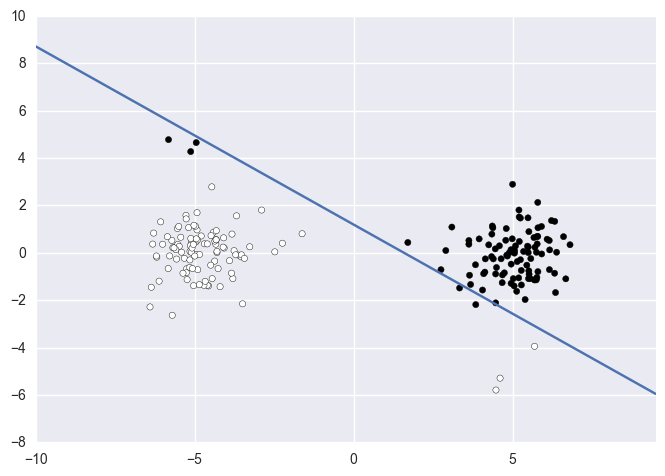

In [4]:
fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c = y)

def svm_boundary(x):
    return - (clf.weight[0] * x + clf.bias) /clf.weight[1] 

boundary = pd.Series(svm_boundary(np.arange(-10, 10, 0.5)), index = np.arange(-10, 10, 0.5))
boundary.plot(ax = ax)